In [0]:
# Base Model

In [0]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import itertools

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
import scipy.io as sio
My_data = sio.loadmat('drive/Plant Classification Using C-CNN/train/Image_Processed_1data.mat')
x_train = My_data['train']
labels = My_data["train_labels"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train, labels, test_size = 0.1, random_state=10, stratify =labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=10, stratify=y_train)

In [0]:
input_shape = x_train[1].shape
print('Input Shape is :', input_shape)

Input Shape is : (256, 256, 4)


In [0]:
from keras.layers import MaxPooling2D
from keras.layers import Add
from keras.layers import BatchNormalization
from keras.applications.vgg19 import VGG19
from keras.layers import Activation

#Prepare input for VGG  

#ip= Conv2D(3, (1,1), padding='same')(image)
#Apply VGG

#Creat VGG model
#VGG_model = Model(image_input, out)

#Copy all layers from VGG
#model_new =Sequential()
#image_input=Input(shape=input_shape)
#ip= Conv2D(3, (1,1), padding='same')(image)
#VGG_model =VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling='max', classes=1000)
#for layer in VGG_model.layers:
  #model_new.add(layer)
  
#model_new.layers.pop()
#model_new.layers.pop()

#for layer in model_new.layers:
  #layer.trainable= True
  
#model_new.add(Dropout(0.5))
#model_new.add(Dense(4096))
#model_new.add(Dropout(0.3))
#model_new.add(Dense(12, activation ='softmax'))
#Remove last 2 layer of model copied from VGG
#model_new.layers.pop()
#model_new.layers.pop()

#for layer in model_new.layers:
  #layer.trainable = False
  
##
##BASE Network

image_input=Input(shape=input_shape)
x = Conv2D(32, (11,11), strides=(4, 4), padding='valid')(image_input)
x = LeakyReLU(alpha=0.0)(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)

x = Conv2D(48, (5,5), padding='same')(x)
x = LeakyReLU(alpha=0.0)(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)


x = Conv2D(64, (3,3), padding='same')(x)
x = LeakyReLU(alpha=0.0)(x)
#x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)

x = Conv2D(16, (3,3), padding='same')(x)
x = LeakyReLU(alpha=0.0)(x)

x = Conv2D(16, (3,3), padding='same')(x)
x = LeakyReLU(alpha=0.0)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)

x= Flatten()(x)

x= Dense(1024)(x)
x = LeakyReLU(alpha=0.0)(x)


x= Dense(1024)(x)
x = LeakyReLU(alpha=0.0)(x)


out = Dense(12, activation='softmax')(x)

model_new = Model(image_input, out)
model_new.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        15520     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 48)        38448     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 31, 31, 48)        0         
__________

In [0]:
model_new.compile(optimizer = Adam(lr=.000125) , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
#%%time

history = model_new.fit(x_train, y_train, epochs=12, batch_size=128)

Epoch 1/12
4498/4498 [==============================] - 7s 1ms/step - loss: 2.0516 - acc: 0.3273
Epoch 2/12
4498/4498 [==============================] - 5s 1ms/step - loss: 1.1099 - acc: 0.6203
Epoch 3/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.8336 - acc: 0.7239
Epoch 4/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.6920 - acc: 0.7675
Epoch 5/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.5893 - acc: 0.8030
Epoch 6/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.4826 - acc: 0.8453
Epoch 7/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.4032 - acc: 0.8671
Epoch 8/12


4498/4498 [==============================] - 5s 1ms/step - loss: 0.3729 - acc: 0.8768
Epoch 9/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.2975 - acc: 0.9060
Epoch 10/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.2335 - acc: 0.9251
Epoch 11/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.2946 - acc: 0.9046
Epoch 12/12
4498/4498 [==============================] - 5s 1ms/step - loss: 0.1691 - acc: 0.9509


In [0]:
y_val_pred = model_new.evaluate(x_val, y_val, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Validation Loss = " + str(y_val_pred[0]))
print ("Validation Accuracy = " + str(y_val_pred[1]))

500/500 [==============================] - 1s 1ms/step

Validation Loss = 0.7483482012748718
Validation Accuracy = 0.7759999995231628


In [0]:
y_test_pred = model_new.evaluate(x_test, y_test, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Test Loss = " + str(y_test_pred[0]))
print ("Test Accuracy = " + str(y_test_pred[1]))

556/556 [==============================] - 0s 864us/step

Test Loss = 0.7374404694536607
Test Accuracy = 0.7913669060460098


In [0]:
y_train_pred = model_new.evaluate(x_train, y_train, batch_size=32, verbose=1, sample_weight=None)
print ("Train Loss = " + str(y_train_pred[0]))
print ("Train Accuracy = " + str(y_train_pred[1]))

4498/4498 [==============================] - 4s 779us/step
Train Loss = 0.28554560509773297
Train Accuracy = 0.8988439306358381


In [0]:
y_train_pred =model_new.predict(x_train, batch_size=64, verbose=1, steps=None)
y_test_pred =model_new.predict(x_test, batch_size=64, verbose=1, steps=None)
y_val_pred =model_new.predict(x_val, batch_size=64, verbose=1, steps=None)

500/500 [==============================] - 0s 852us/step


In [0]:
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

In [0]:
y_train_x = np.argmax(y_train, axis=1)
y_test_x = np.argmax(y_test, axis=1)
y_val_x = np.argmax(y_val, axis=1)

Classification Matrix
[[ 90   0   0   0   1   0 159   0   1   0   0   0]
 [  0 356   0   0   0   0   0   0   7   0   3   0]
 [  1   2 251   0   0   0   0   0  14   0   3   0]
 [  0   0   0 571   0   0   1   0   6   0   0   0]
 [ 34   0   0   2  77   1  80   1  10   0   0   0]
 [  2   0   0   9   0 381  24   0  20   0   0   0]
 [  0   0   0   0   0   0 620   0   0   0   0   0]
 [  1   0   0   0   0   0   1 201   5   0   0   0]
 [  0   0   0   0   0   0   1   0 491   0   0   0]
 [  0   0   0   4   0   0   0   0  23 195   0   0]
 [  0   0   0   1   0   0   1   0   1   0 471   0]
 [  0   0   0   4   0   2   1   0  26   0   3 339]]
Confusion matrix
[[0.36 0.   0.   0.   0.   0.   0.63 0.   0.   0.   0.   0.  ]
 [0.   0.97 0.   0.   0.   0.   0.   0.   0.02 0.   0.01 0.  ]
 [0.   0.01 0.93 0.   0.   0.   0.   0.   0.05 0.   0.01 0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.17 0.   0.   0.01 0.38 0.   0.39 0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.87 0

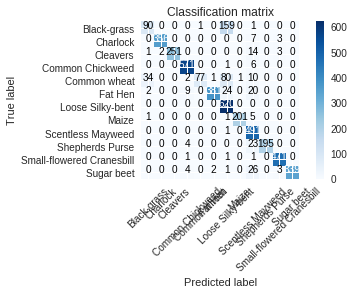

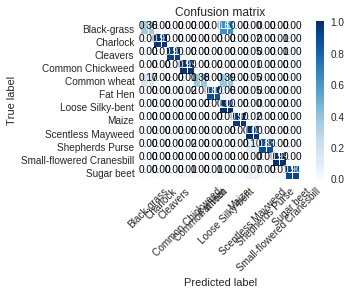

In [0]:
from sklearn.metrics import confusion_matrix
SPECIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen',
              'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse',
              'Small-flowered Cranesbill', 'Sugar beet']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Classification Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for Train
cnf_matrix = confusion_matrix(y_train_x, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES,
                      title='Classification matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES, normalize=True,
                      title='Confusion matrix')



plt.show()



Classification Matrix
[[ 7  0  0  0  0  0 24  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  3  0]
 [ 1  2 23  1  0  0  0  0  7  0  0  0]
 [ 0  0  0 68  1  0  0  0  2  0  0  0]
 [ 8  0  1  0  6  2  8  0  0  0  0  0]
 [ 0  1  1  2  0 43  1  0  3  0  2  1]
 [ 1  0  0  2  0  0 73  0  1  0  0  0]
 [ 0  0  0  2  0  0  0 24  0  0  0  0]
 [ 0  0  0  1  0  0  2  0 57  1  0  0]
 [ 0  0  0  3  0  0  0  0 13  9  2  0]
 [ 0  0  0  1  0  0  1  1  2  1 53  0]
 [ 1  0  0  0  0  0  0  0  9  0  1 35]]
Confusion matrix
[[0.23 0.   0.   0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]
 [0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.03 0.06 0.68 0.03 0.   0.   0.   0.   0.21 0.   0.   0.  ]
 [0.   0.   0.   0.96 0.01 0.   0.   0.   0.03 0.   0.   0.  ]
 [0.32 0.   0.04 0.   0.24 0.08 0.32 0.   0.   0.   0.   0.  ]
 [0.   0.02 0.02 0.04 0.   0.8  0.02 0.   0.06 0.   0.04 0.02]
 [0.01 0.   0.   0.03 0.   0.   0.95 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.08 0.   0.   0.   0.92 0.   0.  

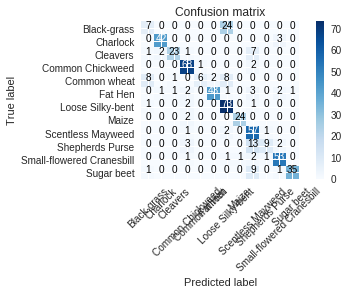

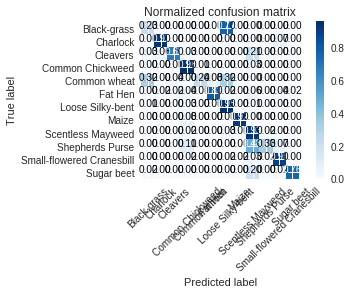

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_x, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Classification Matrix
[[ 7  0  0  0  0  0 21  0  0  0  0  0]
 [ 0 35  0  0  0  2  0  0  2  1  1  0]
 [ 0  2 25  0  0  0  1  0  2  0  0  0]
 [ 0  0  0 60  0  0  0  0  3  0  1  0]
 [ 6  0  1  0  2  1 11  0  1  0  0  1]
 [ 0  1  0  5  0 31  4  0  7  0  0  0]
 [ 0  0  0  0  0  0 66  0  2  0  1  0]
 [ 0  0  1  1  0  0  0 19  0  0  1  1]
 [ 1  0  0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  3  0  1  0  0  2 18  1  0]
 [ 0  2  0  0  0  0  0  0  1  0 50  0]
 [ 0  0  0  1  0  1  0  1 11  0  4 24]]
Confusion matrix
[[0.25 0.   0.   0.   0.   0.   0.75 0.   0.   0.   0.   0.  ]
 [0.   0.85 0.   0.   0.   0.05 0.   0.   0.05 0.02 0.02 0.  ]
 [0.   0.07 0.83 0.   0.   0.   0.03 0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.94 0.   0.   0.   0.   0.05 0.   0.02 0.  ]
 [0.26 0.   0.04 0.   0.09 0.04 0.48 0.   0.04 0.   0.   0.04]
 [0.   0.02 0.   0.1  0.   0.65 0.08 0.   0.15 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.96 0.   0.03 0.   0.01 0.  ]
 [0.   0.   0.04 0.04 0.   0.   0.   0.83 0.   0.  

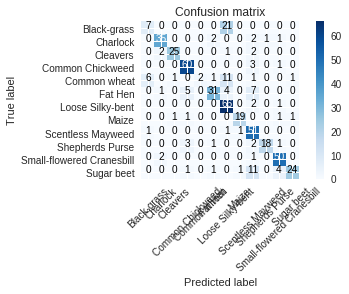

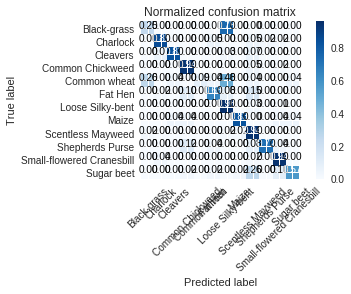

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val_x, y_val_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=SPECIES, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

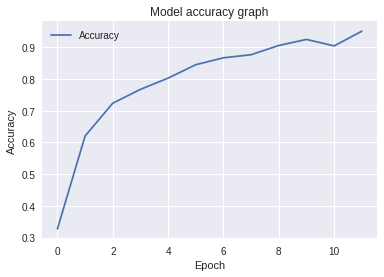

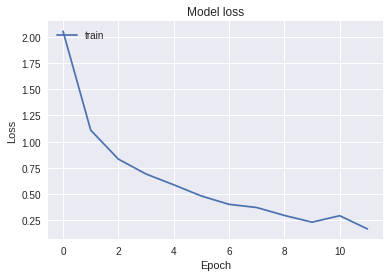

In [0]:
from matplotlib import axes as plt2
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.plot(history.history['loss'])
plt.title('Model accuracy graph')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='upper centre')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()